# EDA para ML

In [1]:
import pandas as pd
from textblob import TextBlob
import time
import string
import matplotlib.pyplot as plt


Preparación de datos

DataFrame Steam Games

Cargo la base de datos y reviso el tipo de cada columna de los dataset. Realizo conversiones de tipos de datos.

In [2]:
df_steam_games = pd.read_csv('steam_games.csv')

C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Elimino Nulos y duplicados

In [3]:
df_steam_games.dropna(subset= ['id'], inplace=True)

In [4]:
df_steam_games.drop_duplicates(inplace=True)

Preparo la columna de release_date (fecha de lanzamiento) para obtener el año de lanzamiento

In [5]:

# Convierte la columna 'release_date' a objetos de fecha con el formato 'YYYY-MM-DD'
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], format='%Y-%m-%d', errors='coerce')

# Extrae el año y crea una nueva columna 'release_year'
df_steam_games['release_year'] = df_steam_games['release_date'].dt.year

df_steam_games = df_steam_games.drop('release_date', axis=1)


Preparo la columna de Genres (género) para obtener info sobre el tipo de juego

In [6]:
#Convierto genres en str
df_steam_games['genres'] = df_steam_games['genres'].astype(str)
# Desanidar la columna 'genres' y crear una nueva columna 'genre'
df_steam_games['genre'] = df_steam_games['genres'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Explotar la columna 'genre' en múltiples filas
df_steam_games = df_steam_games.explode('genre')

In [7]:

#Elimino la genres original
df_steam_games = df_steam_games.drop('genres',axis=1)

Preparo la columna de Tag (etiqueta) para obtener info sobre el tipo de juego

In [8]:
#Convierto tags en str
df_steam_games['tags'] = df_steam_games['tags'].astype(str)
# Desanidar la columna 'tags' y crear una nueva columna 'tags'
df_steam_games['tag'] = df_steam_games['tags'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Explotar la columna 'tag' en múltiples filas
df_steam_games = df_steam_games.explode('tag')



In [9]:

#Elimino la tag original
df_steam_games = df_steam_games.drop('tags',axis=1)

Preparo la columna de Specs (especificaciones) 

In [10]:
#Convierto columna specs en str
df_steam_games['specs'] = df_steam_games['specs'].astype(str)
# Desanidar la columna 'tags' y crear una nueva columna 'tags'
df_steam_games['spec'] = df_steam_games['specs'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Explotar la columna 'tag' en múltiples filas
df_steam_games = df_steam_games.explode('spec')


In [11]:
#Elimino la specs original
df_steam_games = df_steam_games.drop('specs',axis=1)

Elimino variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [12]:
df_steam_games['developer'].describe() #por ahora dejo esta columna

count                 1994881
unique                  10992
top       SmiteWorks USA, LLC
freq                    45621
Name: developer, dtype: object

In [13]:
df_steam_games = df_steam_games.drop('url',axis=1) #'''No lo usare para el sistema de recomendacion'''
df_steam_games = df_steam_games.drop('reviews_url',axis=1) #'''No lo usare para el sistema de recomendacion'''
df_steam_games = df_steam_games.drop('publisher',axis=1) #'''Por tener nulos y no ser necesario'''
df_steam_games = df_steam_games.drop('title',axis=1) #'''Por tener nulos y no ser necesario'''
df_steam_games = df_steam_games.drop('genre',axis=1) #'''Por ser redundante con tag'''


In [15]:
#Elimino los NAN de la columna price, devloper y release_year
df_steam_games.dropna(subset=['price'], inplace=True)
df_steam_games.dropna(subset=['developer'], inplace=True)
df_steam_games.dropna(subset=['release_year'], inplace=True)

In [16]:
print(df_steam_games.isna().sum())


app_name        0
price           0
early_access    0
id              0
developer       0
release_year    0
tag             0
spec            0
dtype: int64


In [17]:
df_steam_games

,app_name,price,early_access,id,developer,release_year,tag,spec
88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Strategy,Single-player
88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Action,Single-player
88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Indie,Single-player
88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Casual,Single-player
88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Simulation,Single-player
...,...,...,...,...,...,...,...,...
120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Atmospheric,Steam Achievements
120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Atmospheric,Steam Cloud
120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Relaxing,Single-player
120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Relaxing,Steam Achievements


In [48]:
df_steam_games.to_csv('EDA_steam_game.csv')

DataFrame User Reviews

Cargo la base de datos y reviso el tipo de cada columna de los dataset. Realizo conversiones de tipos de datos.

In [19]:
df_user_reviews = pd.read_csv('user_reviews.csv')

Elimino Nulos y duplicados

In [21]:
df_user_reviews.dropna(subset= ['user_id'], inplace=True)

In [22]:
df_user_reviews.drop_duplicates(inplace=True)

Preparo la columna posted de fecha para obtener el año del review

In [23]:
# Reemplaza 'df' con el nombre real de tu DataFrame y 'columna_texto' con el nombre de la columna que deseas modificar
df_user_reviews['posted'] = df_user_reviews['posted'].str.replace('Posted', '', case=False)


# Reemplaza 'df' con el nombre real de tu DataFrame y 'columna_texto' con el nombre de la columna que deseas modificar
palabras_a_eliminar = [    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"]

for palabra in palabras_a_eliminar:
    df_user_reviews['posted'] = df_user_reviews['posted'].str.replace(palabra, ' ', case=False)

df_user_reviews['posted'] = df_user_reviews['posted'].str.replace(',', '-', case=False)
df_user_reviews['posted'] = df_user_reviews['posted'].str.replace('.', '', case=False)

# Divide la columna 'posted' por el guion y selecciona la segunda parte
df_user_reviews['posted'] = df_user_reviews['posted'].str.split('-').str[1]

# Convierte la columna 'posted' a tipo numérico si es necesario
df_user_reviews['posted'] = pd.to_numeric(df_user_reviews['posted'], errors='coerce')


C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [25]:
df_user_reviews.dropna(subset = ['posted'], inplace= True)

In [26]:
df_user_reviews['posted'] = df_user_reviews['posted'].astype(int)

Elimino variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [27]:
df_user_reviews = df_user_reviews.drop('user_url',axis=1) #'''No lo usare para el sistema de recomendacion'''
df_user_reviews = df_user_reviews.drop('last_edited',axis=1) #'''Muchos nulos y no lo usare para el sistema de recomendacion'''
df_user_reviews = df_user_reviews.drop('funny',axis=1) #'''Muchos nulos y no lo usare para el sistema de recomendacion'''
df_user_reviews = df_user_reviews.drop('helpful',axis=1) #'''Interesante, pero no lo usare para el sistema de recomendacion ya que no se qué usuarios, fueron los que dijeron el comentario era helpful'''
df_user_reviews = df_user_reviews.drop('0',axis=1) #'''Sin info'''


In [29]:
#Elimino los NAN de la columna review
df_user_reviews.dropna(subset=['review'], inplace=True)

In [30]:
print(df_user_reviews.isna().sum())


user_id      0
item_id      0
posted       0
recommend    0
review       0
dtype: int64


Transformo Review por Análisis de Sentimiento con TextBlob

In [31]:
df_user_reviews['review'] = df_user_reviews['review'].astype(str)

In [32]:
from textblob import TextBlob

# Define la función de análisis de sentimiento
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_polarity = analysis.sentiment.polarity

    # Determinar el sentimiento basado en la polaridad
    if sentiment_polarity > 0:
        sentiment = 2
    elif sentiment_polarity < 0:
        sentiment = 0
    else:
        sentiment = 1

    return sentiment_polarity, sentiment

In [33]:
df_user_reviews['polarity'], df_user_reviews['sentiment'] = zip(*df_user_reviews['review'].apply(analyze_sentiment))

In [34]:
df_user_reviews = df_user_reviews.drop('review', axis = 1)

In [35]:
df_user_reviews

,user_id,item_id,posted,recommend,polarity,sentiment
0,76561197970982479,1250.0,2011,True,0.174444,2
1,76561197970982479,22200.0,2011,True,0.337500,2
2,76561197970982479,43110.0,2011,True,0.050000,2
3,js41637,251610.0,2014,True,0.114583,2
4,js41637,227300.0,2013,True,-0.036111,0
...,...,...,...,...,...,...
59280,wayfeng,730.0,2015,True,0.000000,1
59283,76561198251004808,253980.0,2015,True,0.300000,2
59293,72947282842,730.0,2015,True,-0.512500,0
59295,ApxLGhost,730.0,2015,True,0.100000,2


In [45]:
df_user_reviews.to_csv('EDA_user_review.csv', index = False)

DataFrame User Items

Cargo la base de datos y reviso el tipo de cada columna de los dataset. Realizo conversiones de tipos de datos.

In [36]:
df_user_items = pd.read_csv('user_items_2.csv')

Elimino Nulos y duplicados

In [38]:
df_user_items.dropna(subset= ['user_id'], inplace=True)

In [39]:
df_user_items.drop_duplicates(inplace=True)

Elimino variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [40]:
#Una parte ya realizado al abrir y preparar el json
df_user_items = df_user_items.drop('playtime_2weeks',axis=1) #'''No lo usare para el sistema de recomendacion'''


In [41]:
print(df_user_items.isna().sum())


item_id             0
item_name           0
playtime_forever    0
user_id             0
dtype: int64


In [42]:
df_user_items = df_user_items.sort_values(by='user_id')

In [43]:
df_user_items

,item_id,item_name,playtime_forever,user_id
1808413,200210,Realm of the Mad God,166,--000--
1808427,263760,Turbo Dismount,244,--000--
1808426,233190,Final Exam,193,--000--
1808425,218620,PAYDAY 2,416,--000--
1808424,225640,Sacred 2 Gold,5,--000--
...,...,...,...,...
4431652,17080,Tribes: Ascend,475,zzzmidmiss
4431653,105430,Age of Empires Online,358,zzzmidmiss
4431654,113400,APB Reloaded,16,zzzmidmiss
4431640,200390,Oil Rush,45,zzzmidmiss


In [46]:
df_user_items.to_csv('EDA_user_item.csv', index = False)

Reviso la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

    df_steam_games['price'], ['release_date']
    df_user_reviews['posted'],  ['sentiment'], ['polarity'](este ultimo no lo uso)
    df_user_items ['playtime_forever']
    



In [49]:
df_EDA_steam = pd.read_csv('EDA_steam_game.csv')

Precio

In [52]:
df_EDA_steam['price'].value_counts()

9.99      281035
4.99      222426
14.99     176084
19.99     158296
2.99      145068
           ...  
199.0          2
234.99         1
4.29           1
124.99         1
99.0           1
Name: price, Length: 150, dtype: int64

In [53]:
df_EDA_steam['price'].describe()

count     1924632
unique        150
top          9.99
freq       281035
Name: price, dtype: object

In [54]:
#como hay valores escritos str, los llevare a 0, entiendiendo que son versiones gratuitas.

df_EDA_steam.loc[df_EDA_steam['price'] == 'Free To Play', 'price'] = 0
# Lista de valores a reemplazar
values_to_replace = ['Free Demo', 'Play for Free!', 'Free','Install Theme', 'Install Now', 'Free Mod', 'Install Theme', 'Third-party', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free to Use']

# Cambiar los valores en la columna 'price' por 0
df_EDA_steam['price'].replace(values_to_replace, 0, inplace=True)



In [55]:
df_EDA_steam.loc[df_EDA_steam['price'] == 'Play WARMACHINE: Tactics Demo', 'price'] = 0

In [56]:
df_EDA_steam['price'].unique()

array(['4.99', 0, 'Free to Play', '0.99', '3.99', '9.99', '18.99',
       '29.99', '10.99', '2.99', '1.59', '14.99', '1.99', '59.99', '8.99',
       '6.99', '7.99', '39.99', '19.99', '7.49', '12.99', '5.99', '2.49',
       '15.99', '1.25', '24.99', '17.99', '61.99', '3.49', '11.99',
       '13.99', '34.99', '1.49', '32.99', '99.99', '14.95', '69.99',
       '16.99', '79.99', '49.99', '5.0', '13.98', '29.96', '119.99',
       '109.99', '149.99', '771.71', '21.99', '89.99', '0.98', '139.92',
       '4.29', '54.99', '64.99', '74.99', '0.89', '0.5', '299.99', '1.29',
       '44.99', '3.0', '15.0', '5.49', '23.99', '49.0', '10.93', '1.39',
       '36.99', '4.49', '2.0', '4.0', '234.99', '1.95', '1.5', '199.0',
       '189.0', '6.66', '27.99', '129.99', '179.0', '26.99', '399.99',
       '31.99', '399.0', '20.0', '40.0', '3.33', '22.99', '320.0',
       '38.85', '71.7', '995.0', '27.49', '3.39', '6.0', '19.95', '20.99',
       '499.99', '199.99', '16.06', '4.68', '131.4', '44.98', '202.76',


In [58]:
df_EDA_steam['price'] = pd.to_numeric(df_EDA_steam['price'], errors='coerce')
df_EDA_steam['price'] = df_EDA_steam['price'].astype(float)

In [59]:
# Usar value_counts para contar la frecuencia de cada valor único en 'column_name'
value_counts =df_EDA_steam['price'].value_counts()

# Imprimir el resultado
print(value_counts)
print(value_counts.head(10))

9.99      281035
4.99      222426
14.99     176084
19.99     158296
2.99      145068
           ...  
199.00         2
234.99         1
4.29           1
124.99         1
99.00          1
Name: price, Length: 136, dtype: int64
9.99     281035
4.99     222426
14.99    176084
19.99    158296
2.99     145068
1.99     113060
0.99     106992
0.00     101208
3.99      76527
7.99      66934
Name: price, dtype: int64


In [60]:
# Calcular el primer cuartil (Q1)
q1 = df_EDA_steam['price'].quantile(0.25)

# Calcular la mediana (Q2)
q2 = df_EDA_steam['price'].quantile(0.5)

# Calcular el tercer cuartil (Q3)
q3 = df_EDA_steam['price'].quantile(0.75)

print("Primer cuartil (Q1):", q1)
print("Mediana (Q2):", q2)
print("Tercer cuartil (Q3):", q3)

Primer cuartil (Q1): 2.99
Mediana (Q2): 7.99
Tercer cuartil (Q3): 14.99


In [61]:
#outliers
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_EDA_steam['price'].quantile(0.25)
Q3 = df_EDA_steam['price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_EDA_steam[(df_EDA_steam['price'] < lower_limit) | (df_EDA_steam['price'] > upper_limit)]

# Imprimir los valores atípicos
print("Valores atípicos:")
print(outliers['price'].unique())
#En este código, identificamos los valores atípicos en la columna especificada ('column_name') y los almacenamos en el DataFrame 'outliers'. Puedes ajustar el factor multiplicativo (1.5) en los límites según tus criterios para definir qué se considera un valor atípico.

Valores atípicos:
[ 59.99  39.99  61.99  34.99  99.99  69.99  79.99  49.99 119.99 109.99
 149.99 771.71  89.99 139.92  54.99  64.99  74.99 299.99  44.99  49.
  36.99 234.99 199.   189.   129.99 179.   399.99 399.    40.   320.
  38.85  71.7  995.   499.99 199.99 131.4   44.98 202.76 172.24 249.99
  99.    87.94  42.99  41.99 289.99  59.95 189.96 124.99 160.91]


In [62]:


# Define una función para mapear los rangos
def asignar_rango(precio):
    if precio == 0:
        return 0
    elif 0 < precio < 3:
        return 1
    elif 3 <= precio < 7:
        return 2
    elif 7 <= precio < 15:
        return 3
    elif 15 <= precio < 30:
        return 4
    elif 30 <= precio < 60:
        return 5
    else:
        return 6

# Aplica la función a la columna 'price' y crea una nueva columna 'price_range'
df_EDA_steam['price_range'] = df_EDA_steam['price'].apply(asignar_rango)

df_EDA_steam

,Unnamed: 0,app_name,price,early_access,id,developer,release_year,tag,spec,price_range
0,88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Strategy,Single-player,2
1,88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Action,Single-player,2
2,88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Indie,Single-player,2
3,88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Casual,Single-player,2
4,88310,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018.0,Simulation,Single-player,2
...,...,...,...,...,...,...,...,...,...,...
1924627,120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Atmospheric,Steam Achievements,2
1924628,120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Atmospheric,Steam Cloud,2
1924629,120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Relaxing,Single-player,2
1924630,120443,EXIT 2 - Directions,4.99,False,658870.0,"xropi,stev3ns",2017.0,Relaxing,Steam Achievements,2


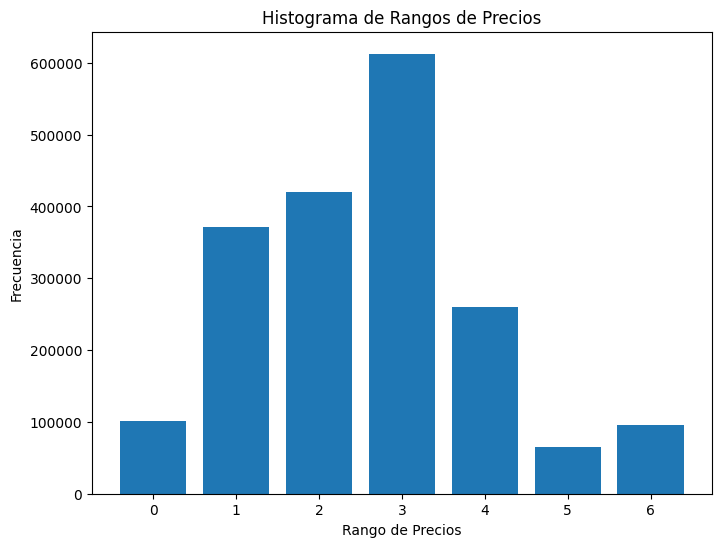

'Rango 0: Gratuito\nRango 1: Precio mayor a 0 y menor a 3\nRango 2: Precio mayor o igual a 3 y menor a 7\nRango 3: Precio mayor o igual a 7 y menor a 15\nRango 4: Precio mayor o igual a 15 y menor a 30\nRango 5: Precio mayor o igual a 30 y menor a 60\nRango 6: Precio mayor a 60'

In [63]:

plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Crear un histograma de la columna 'price_range'
plt.hist(df_EDA_steam['price_range'], bins=[0, 1, 2, 3, 4, 5, 6, 7], rwidth=0.8, align='left')

# Configuración de etiquetas y título
plt.xlabel('Rango de Precios')
plt.ylabel('Frecuencia')
plt.title('Histograma de Rangos de Precios')

# Etiquetas de los ticks en el eje x
plt.xticks(range(7), ['0', '1', '2', '3', '4', '5', '6'])

# Mostrar el gráfico
plt.show()

'''Rango 0: Gratuito
Rango 1: Precio mayor a 0 y menor a 3
Rango 2: Precio mayor o igual a 3 y menor a 7
Rango 3: Precio mayor o igual a 7 y menor a 15
Rango 4: Precio mayor o igual a 15 y menor a 30
Rango 5: Precio mayor o igual a 30 y menor a 60
Rango 6: Precio mayor a 60'''

Año de Lanzamiento Release Year

In [67]:
df_EDA_steam['release_year'].value_counts()

2017.0    613281
2016.0    505553
2015.0    352152
2014.0    202161
2013.0     96987
2012.0     55408
2011.0     32482
2010.0     17350
2009.0     10811
2008.0      5598
2007.0      5531
2006.0      4522
2018.0      4359
2003.0      3146
2005.0      3080
2001.0      2172
2004.0      1705
1997.0      1297
1999.0      1217
2002.0      1068
1998.0       911
1996.0       648
2000.0       608
1994.0       575
1995.0       516
1993.0       355
1992.0       251
1988.0       163
1991.0       132
1984.0       126
1983.0       108
1986.0        90
1990.0        78
1989.0        73
2019.0        72
1987.0        26
2021.0        18
1985.0         2
Name: release_year, dtype: int64

In [68]:
df_EDA_steam['release_year'].describe()

count    1.924632e+06
mean     2.015264e+03
std      2.348809e+00
min      1.983000e+03
25%      2.015000e+03
50%      2.016000e+03
75%      2.017000e+03
max      2.021000e+03
Name: release_year, dtype: float64

In [69]:
df_EDA_steam['release_year'].unique()

array([2018., 2017., 1997., 1998., 2016., 2006., 2005., 2003., 2007.,
       2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004., 2008.,
       2009., 1999., 1992., 1989., 2010., 2011., 2013., 2012., 2014.,
       1983., 1984., 2015., 1990., 1988., 1991., 1987., 1986., 2021.,
       2019., 1985.])

In [70]:
# Usar value_counts para contar la frecuencia de cada valor único en 'column_name'
value_counts =df_EDA_steam['release_year'].value_counts()

# Imprimir el resultado
print(value_counts)


2017.0    613281
2016.0    505553
2015.0    352152
2014.0    202161
2013.0     96987
2012.0     55408
2011.0     32482
2010.0     17350
2009.0     10811
2008.0      5598
2007.0      5531
2006.0      4522
2018.0      4359
2003.0      3146
2005.0      3080
2001.0      2172
2004.0      1705
1997.0      1297
1999.0      1217
2002.0      1068
1998.0       911
1996.0       648
2000.0       608
1994.0       575
1995.0       516
1993.0       355
1992.0       251
1988.0       163
1991.0       132
1984.0       126
1983.0       108
1986.0        90
1990.0        78
1989.0        73
2019.0        72
1987.0        26
2021.0        18
1985.0         2
Name: release_year, dtype: int64


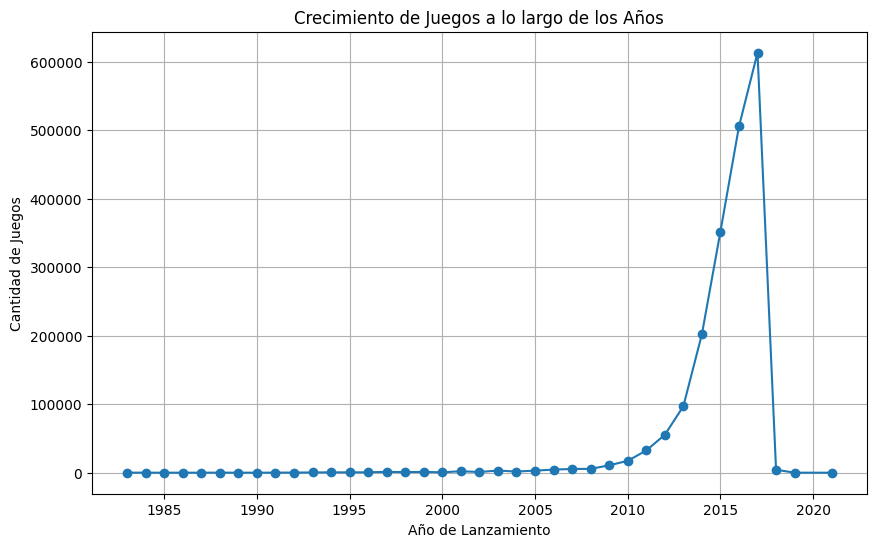

In [71]:
# Agrupar los datos por año y contar la cantidad de juegos en cada año
yearly_counts = df_EDA_steam['release_year'].value_counts().sort_index()

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')

# Configuración de etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Crecimiento de Juegos a lo largo de los Años')

# Mostrar el gráfico
plt.grid()
plt.show()

In [72]:
df_EDA_reviews = pd.read_csv('EDA_user_review.csv')

Posted

In [74]:
df_EDA_reviews['posted'].value_counts()

2014    21821
2015    18146
2013     6707
2012     1201
2011      530
2010       66
Name: posted, dtype: int64

In [75]:
df_EDA_reviews['posted'].describe()

count    48471.000000
mean      2014.148192
std          0.842674
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted, dtype: float64

Sentiment

In [77]:
df_EDA_reviews['sentiment'].value_counts()

2    27772
1    10530
0    10169
Name: sentiment, dtype: int64

In [78]:
value_counts_sentiment =df_EDA_reviews['sentiment'].value_counts()
value_counts_sentiment 


2    27772
1    10530
0    10169
Name: sentiment, dtype: int64

Tiempo total de juego playtime_forever

In [79]:
df_EDA_items = pd.read_csv('EDA_user_item.csv')

C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
df_EDA_items

,item_id,item_name,playtime_forever,user_id
0,200210,Realm of the Mad God,166,--000--
1,263760,Turbo Dismount,244,--000--
2,233190,Final Exam,193,--000--
3,218620,PAYDAY 2,416,--000--
4,225640,Sacred 2 Gold,5,--000--
...,...,...,...,...
5094100,17080,Tribes: Ascend,475,zzzmidmiss
5094101,105430,Age of Empires Online,358,zzzmidmiss
5094102,113400,APB Reloaded,16,zzzmidmiss
5094103,200390,Oil Rush,45,zzzmidmiss


In [82]:
df_EDA_items['playtime_forever'].value_counts()

0         1847730
1          101586
2           34391
3           31530
4           29127
           ...   
28671           1
193520          1
30500           1
39459           1
57545           1
Name: playtime_forever, Length: 48861, dtype: int64

In [83]:
df_EDA_items['playtime_forever'].describe()

count    5.094105e+06
mean     9.905511e+02
std      5.414297e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

In [84]:
df_EDA_items['playtime_forever'].value_counts()

0         1847730
1          101586
2           34391
3           31530
4           29127
           ...   
28671           1
193520          1
30500           1
39459           1
57545           1
Name: playtime_forever, Length: 48861, dtype: int64

In [ ]:
#elimino los valores de playtime_forever 0 (cero) ya que no me aportaran para el modelo

In [85]:
df_EDA_items = df_EDA_items[df_EDA_items['playtime_forever'] != 0]


In [86]:
df_EDA_items['playtime_forever'].value_counts()

1        101586
2         34391
3         31530
4         29127
5         27612
          ...  
23112         1
44840         1
34509         1
89537         1
57545         1
Name: playtime_forever, Length: 48860, dtype: int64

In [87]:
# Calcular el primer cuartil (Q1)
q1 = df_EDA_items['playtime_forever'].quantile(0.25)

# Calcular la mediana (Q2)
q2 = df_EDA_items['playtime_forever'].quantile(0.5)

# Calcular el tercer cuartil (Q3)
q3 = df_EDA_items['playtime_forever'].quantile(0.75)

print("Primer cuartil (Q1):", q1)
print("Mediana (Q2):", q2)
print("Tercer cuartil (Q3):", q3)

Primer cuartil (Q1): 44.0
Mediana (Q2): 205.0
Tercer cuartil (Q3): 808.0


In [88]:
#outliers
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_EDA_items['playtime_forever'].quantile(0.25)
Q3 = df_EDA_items['playtime_forever'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_EDA_items[(df_EDA_items['playtime_forever'] < lower_limit) | (df_EDA_items['playtime_forever'] > upper_limit)]

# Imprimir los valores atípicos
print("Valores atípicos:")
print(outliers)
print(outliers['playtime_forever'].value_counts())
#En este código, identificamos los valores atípicos en la columna especificada ('column_name') y los almacenamos en el DataFrame 'outliers'. Puedes ajustar el factor multiplicativo (1.5) en los límites según tus criterios para definir qué se considera un valor atípico.

Valores atípicos:
         item_id                                     item_name  \
16        113400                                  APB Reloaded   
26        339610                 FreeStyle2: Street Basketball   
36        304930                                      Unturned   
38        304050                                         Trove   
42           730              Counter-Strike: Global Offensive   
...          ...                                           ...   
5094014    42690  Call of Duty: Modern Warfare 3 - Multiplayer   
5094018   202990      Call of Duty: Black Ops II - Multiplayer   
5094022      730              Counter-Strike: Global Offensive   
5094032   110800                                    L.A. Noire   
5094091    49520                                 Borderlands 2   

         playtime_forever     user_id  
16                   2763     --000--  
26                   5502     --000--  
36                   4037     --000--  
38                   4260    

In [89]:
# Definir la cantidad de categorías deseadas o dejarlo en manos de qcut
num_categorias = 5  # Puedes ajustar este valor según tus preferencias o dejarlo en None

# Utilizar qcut para crear las categorías automáticamente
if num_categorias:
    categorias = pd.qcut(df_EDA_items['playtime_forever'], q=num_categorias, labels=False)
else:
    categorias = pd.qcut(df_EDA_items['playtime_forever'], labels=False)

# Agregar las categorías al DataFrame
df_EDA_items['categorias_playtime'] = categorias

# Ver el DataFrame resultan
df_EDA_items

C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,item_id,item_name,playtime_forever,user_id,categorias_playtime
0,200210,Realm of the Mad God,166,--000--,2
1,263760,Turbo Dismount,244,--000--,2
2,233190,Final Exam,193,--000--,2
3,218620,PAYDAY 2,416,--000--,3
4,225640,Sacred 2 Gold,5,--000--,0
...,...,...,...,...,...
5094100,17080,Tribes: Ascend,475,zzzmidmiss,3
5094101,105430,Age of Empires Online,358,zzzmidmiss,3
5094102,113400,APB Reloaded,16,zzzmidmiss,0
5094103,200390,Oil Rush,45,zzzmidmiss,1


In [90]:
# Calcular los límites de los cuantiles y asignar categorías
categorias, limites_cuantiles = pd.qcut(df_EDA_items['playtime_forever'], q=6, retbins=True, labels=False)

In [92]:
# Encontrar los límites de la categoría 0
limite_inferior_0 = limites_cuantiles[0]
limite_superior_0 = limites_cuantiles[1]

# Imprimir los límites de la categoría 0
print(f"Límite inferior de la categoría 0: {limite_inferior_0}")
print(f"Límite superior de la categoría 0: {limite_superior_0}")

# Encontrar los límites de la categoría 1
limite_inferior_1 = limites_cuantiles[1]
limite_superior_1 = limites_cuantiles[2]

# Imprimir los límites de la categoría 1
print(f"Límite inferior de la categoría 1: {limite_inferior_1}")
print(f"Límite superior de la categoría 1: {limite_superior_1}")

# Encontrar los límites de la categoría 2
limite_inferior_2 = limites_cuantiles[2]
limite_superior_2 = limites_cuantiles[3]

# Imprimir los límites de la categoría 2
print(f"Límite inferior de la categoría 2: {limite_inferior_2}")
print(f"Límite superior de la categoría 2: {limite_superior_2}")


# Encontrar los límites de la categoría 3
limite_inferior_3 = limites_cuantiles[3]
limite_superior_3 = limites_cuantiles[4]

# Imprimir los límites de la categoría 3
print(f"Límite inferior de la categoría 3: {limite_inferior_3}")
print(f"Límite superior de la categoría 3: {limite_superior_3}")

# Encontrar los límites de la categoría 4
limite_inferior_4 = limites_cuantiles[4]
limite_superior_4 = limites_cuantiles[5]

# Imprimir los límites de la categoría 4
print(f"Límite inferior de la categoría 4: {limite_inferior_4}")
print(f"Límite superior de la categoría 4: {limite_superior_4}")

# Encontrar los límites de la categoría 5
limite_inferior_5 = limites_cuantiles[5]
limite_superior_5 = limites_cuantiles[6]

# Imprimir los límites de la categoría 5
print(f"Límite inferior de la categoría 5: {limite_inferior_5}")
print(f"Límite superior de la categoría 5: {limite_superior_5}")

Límite inferior de la categoría 0: 1.0
Límite superior de la categoría 0: 22.0
Límite inferior de la categoría 1: 22.0
Límite superior de la categoría 1: 78.0
Límite inferior de la categoría 2: 78.0
Límite superior de la categoría 2: 205.0
Límite inferior de la categoría 3: 205.0
Límite superior de la categoría 3: 494.0
Límite inferior de la categoría 4: 494.0
Límite superior de la categoría 4: 1454.0
Límite inferior de la categoría 5: 1454.0
Límite superior de la categoría 5: 642773.0


Variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría.
    
    df_steam_games['tag'] y [steam], pero esta ultima no la utilizo 
    
    df_user_review ['recommend']

Tag etiqueta

In [93]:
df_EDA_steam['tag'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Strategy
1               Action
2                Indie
3               Casual
4           Simulation
              ...     
1924627    Atmospheric
1924628    Atmospheric
1924629       Relaxing
1924630       Relaxing
1924631       Relaxing
Name: tag, Length: 1924632, dtype: object>

In [94]:
df_EDA_steam['tag'].describe()

count     1924448
unique        336
top         Indie
freq       206017
Name: tag, dtype: object

In [95]:
df_EDA_steam['tag'].value_counts()

Indie          206017
Action         153382
Casual         114992
Adventure      108600
Strategy       100365
                ...  
Documentary        35
Tutorial           28
Foreign            24
Hardware           18
Faith               9
Name: tag, Length: 336, dtype: int64

Recommend

In [97]:
df_EDA_reviews['recommend'].value_counts()

True     43533
False     4938
Name: recommend, dtype: int64

In [98]:
df_EDA_reviews['recommend'].describe()

count     48471
unique        2
top        True
freq      43533
Name: recommend, dtype: object

In [99]:
# Reemplazar 'True' con 1 y 'False' con 0 en la columna 'recommend'
df_EDA_reviews['recommend'] = df_EDA_reviews['recommend'].replace({True: 1, False: 0})

In [100]:
df_EDA_steam = df_EDA_steam [['id', 'app_name', 'price_range', 'release_year', 'tag']]
df_EDA_steam

,id,app_name,price_range,release_year,tag
0,761140.0,Lost Summoner Kitty,2,2018.0,Strategy
1,761140.0,Lost Summoner Kitty,2,2018.0,Action
2,761140.0,Lost Summoner Kitty,2,2018.0,Indie
3,761140.0,Lost Summoner Kitty,2,2018.0,Casual
4,761140.0,Lost Summoner Kitty,2,2018.0,Simulation
...,...,...,...,...,...
1924627,658870.0,EXIT 2 - Directions,2,2017.0,Atmospheric
1924628,658870.0,EXIT 2 - Directions,2,2017.0,Atmospheric
1924629,658870.0,EXIT 2 - Directions,2,2017.0,Relaxing
1924630,658870.0,EXIT 2 - Directions,2,2017.0,Relaxing


In [101]:
df_EDA_steam.to_csv('df_EDA_steam_for_ML.csv')

In [102]:
df_EDA_reviws_for_ML = df_EDA_reviews[['user_id','item_id', 'recommend', 'sentiment']]
nuevos_nombres = {
    'item_id': 'id',
}

# Usar el método 'rename' para cambiar los nombres de las columnas
df_EDA_reviws_for_ML = df_EDA_reviws_for_ML.rename(columns=nuevos_nombres)
df_EDA_reviws_for_ML

,user_id,id,recommend,sentiment
0,76561197970982479,1250.0,1,2
1,76561197970982479,22200.0,1,2
2,76561197970982479,43110.0,1,2
3,js41637,251610.0,1,2
4,js41637,227300.0,1,0
...,...,...,...,...
48466,wayfeng,730.0,1,1
48467,76561198251004808,253980.0,1,2
48468,72947282842,730.0,1,0
48469,ApxLGhost,730.0,1,2


In [103]:
df_EDA_reviws_for_ML.to_csv('df_EDA_reviws_for_ML.csv')

In [104]:
df_EDA_items_for_ML = df_EDA_items[['item_id','item_name','user_id','categorias_playtime']]

df_EDA_items_for_ML['id'] = df_EDA_items_for_ML['item_id']
df_EDA_items_for_ML = df_EDA_items_for_ML.drop('item_id', axis=1)
df_EDA_items_for_ML.to_csv('df_EDA_items_for_ML.csv')